### Path functions

In [1]:
import os
os.getcwd() # get couurent directory

'C:\\Users\\Weife\\projects\\FaceMaskDetection'

In [2]:
os.path.join(os.getcwd(), "data") # concat path

'C:\\Users\\Weife\\projects\\FaceMaskDetection\\data'

In [3]:
os.path.join(os.getcwd(), "data.txt") # concat path and file

'C:\\Users\\Weife\\projects\\FaceMaskDetection\\data.txt'

In [4]:
os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg") # concat path and file

'C:\\Users\\Weife\\projects\\FaceMaskDetection\\data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg'

### Manipulate images

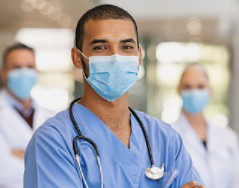

In [5]:
from PIL import Image
Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg") )

In [6]:
Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg")).size

(239, 188)

In [7]:
from torchvision import transforms

In [8]:
# define a transferm
t =transforms.RandomHorizontalFlip(p = 0.5) # with probability = 0.5

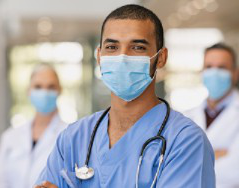

In [9]:
t(Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg") ))

In [10]:
t =transforms.RandomRotation(40)

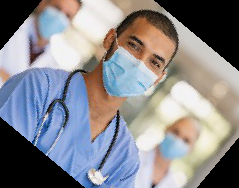

In [11]:
t(Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg") ))

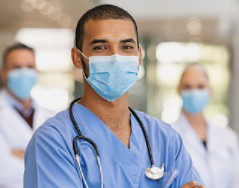

In [12]:
t=transforms.ColorJitter()
t(Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg") ))

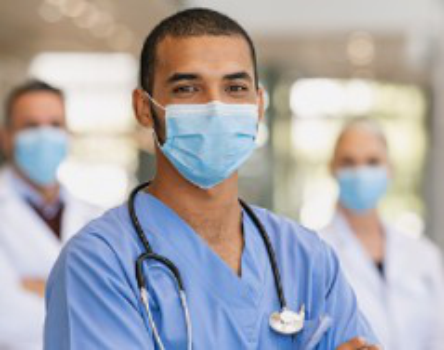

In [13]:
t=transforms.Resize(size=(350))
t(Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg") ))

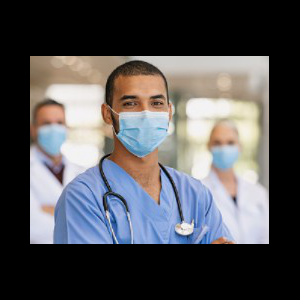

In [14]:
t=transforms.CenterCrop(300)
t(Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg") ))

### Test ToTensor function

In [15]:
#It converts the PIL image with a pixel range of [0, 255] to a PyTorch FloatTensor of shape (C, H, W) 
# with a range [0.0, 1.0] by divided by 255. 

t=transforms.ToTensor()
ts=t(Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg") ))

In [16]:
ts.shape

torch.Size([3, 188, 239])

In [17]:
ts[0].shape # only first channel

torch.Size([188, 239])

In [18]:
ts[0]

tensor([[0.5843, 0.5843, 0.5843,  ..., 0.7725, 0.7569, 0.7490],
        [0.5804, 0.5843, 0.5843,  ..., 0.7765, 0.7647, 0.7569],
        [0.5804, 0.5804, 0.5843,  ..., 0.7843, 0.7765, 0.7647],
        ...,
        [0.7059, 0.7059, 0.7098,  ..., 0.8235, 0.8314, 0.8353],
        [0.6784, 0.6784, 0.6824,  ..., 0.8235, 0.8314, 0.8392],
        [0.6745, 0.6745, 0.6784,  ..., 0.8196, 0.8235, 0.8314]])

In [19]:
# We will verify ToTensor function using numpy 
import numpy as np
img = Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg"))
# convert PIL image to numpy array
img_np = np.array(img)
img_np.shape # note that torch.Size([3, 188, 239]) and image.size is (239, 188)

(188, 239, 3)

In [20]:
import torch
x= torch.from_numpy(img_np)
x = x.type(torch.float32)
x=x/255

In [21]:
x.shape

torch.Size([188, 239, 3])

In [22]:
# note order is different
x=x.permute(2, 0,1)
print(x.shape)

torch.Size([3, 188, 239])


In [23]:
x[0]

tensor([[0.5843, 0.5843, 0.5843,  ..., 0.7725, 0.7569, 0.7490],
        [0.5804, 0.5843, 0.5843,  ..., 0.7765, 0.7647, 0.7569],
        [0.5804, 0.5804, 0.5843,  ..., 0.7843, 0.7765, 0.7647],
        ...,
        [0.7059, 0.7059, 0.7098,  ..., 0.8235, 0.8314, 0.8353],
        [0.6784, 0.6784, 0.6824,  ..., 0.8235, 0.8314, 0.8392],
        [0.6745, 0.6745, 0.6784,  ..., 0.8196, 0.8235, 0.8314]])